In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv(r"D:\Unified Mentor\Disease\drugs_side_effects_drugs_com.csv")

In [22]:
data

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0,https://www.drugs.com/mtm/benzphetamine.html,https://www.drugs.com/condition/obesity.html
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,4,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/mtm/fenfluramine.html,https://www.drugs.com/condition/obesity.html
2928,Fendique ER,Weight Loss,NaN,phendimetrazine tartrate,"Anorexiants, CNS stimulants",NaN,0%,Rx,C,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/pro/fendique-er.html,https://www.drugs.com/condition/obesity.html
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,NaN,0%,Rx,NaN,N,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/imcivree.html,https://www.drugs.com/condition/obesity.html


In [23]:
data.shape


(2931, 17)

In [24]:
data.columns

Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [26]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2926    False
2927    False
2928    False
2929    False
2930    False
Length: 2931, dtype: bool

In [27]:
print('Missing Values are :{}'.format(data.isnull().sum()))

Missing Values are :drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64


In [28]:
data.describe()

,rating,no_of_reviews
count,1586.000000,1586.000000
mean,6.812926,75.064943
std,2.313044,184.900847
min,0.000000,1.000000
25%,5.600000,2.000000
50%,7.000000,12.000000
75%,8.500000,58.000000
max,10.000000,2934.000000


In [29]:
B = data.where(data['csa'].isnull())['drug_name'].count()
B

np.int64(0)

In [30]:
dataclean = data['drug_name'].dropna()

In [31]:
dataclean

0          doxycycline
1       spironolactone
2          minocycline
3             Accutane
4          clindamycin
             ...      
2926     benzphetamine
2927      fenfluramine
2928       Fendique ER
2929          Imcivree
2930     setmelanotide
Name: drug_name, Length: 2931, dtype: object

In [32]:
data.groupby('csa')['drug_name'].count(),data.groupby('csa')['drug_name'].count().sum()

(csa
 2     101
 3      26
 4      71
 5      20
 M      16
 N    2688
 U       9
 Name: drug_name, dtype: int64,
 np.int64(2931))

In [33]:
data.groupby('side_effects')['drug_name'].count()

side_effects
( hives , difficult breathing, swelling in your face or throat) or a severe skin reaction ( fever , sore throat , burning in your eyes, skin pain, red or purple skin rash that spreads and causes blistering and peeling). Call your doctor at once if you have: severe stomach pain, diarrhea that is watery or bloody; fast or pounding heartbeats, fluttering in your chest, shortness of breath, and sudden dizziness (like you might pass out); confusion, spinning sensation; liver problems - loss of appetite, upper stomach pain, tiredness, dark urine, clay-colored stools, jaundice (yellowing of the skin or eyes); or kidney problems - little or no urination, swelling in your feet or ankles, feeling tired or short of breath. If you've ever had heart problems, clarithromycin may cause a heart attack or stroke years after you've taken this medicine. Seek medical attention right away if you have chest pain spreading to your jaw or shoulder, trouble breathing, slurred speech, or sudden num

In [34]:
data.groupby('pregnancy_category')['drug_name'].count().sum()

np.int64(2702)

In [35]:
top_drugs =data.groupby('medical_condition')['drug_name'].value_counts().nlargest(10)
print(top_drugs)

medical_condition  drug_name     
Acne               minocycline       2
Eczema             fluocinolone      2
Herpes             acyclovir         2
ADHD               Adderall          1
                   Adderall XR       1
                   Adhansia XR       1
                   Adzenys ER        1
                   Adzenys XR-ODT    1
                   Aptensio XR       1
                   Azstarys          1
Name: count, dtype: int64


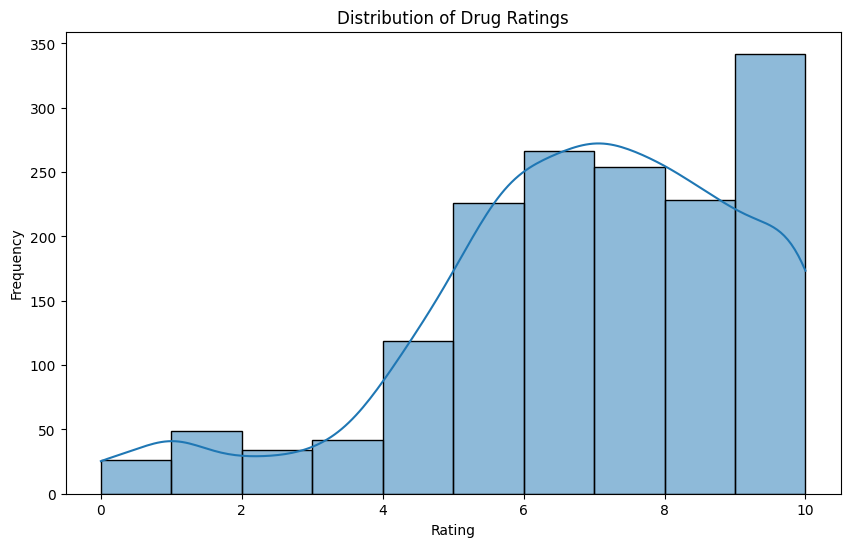

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=10, kde=True)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [37]:
side_effects = data['side_effects'].value_counts().head(10)
side_effects

side_effects
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: redness or swelling of the treated area; increased pain; or severe burning or skin irritation such as a rash, itching, pain, or blistering. Less serious side effects may be more likely, and you may have none at all.                                                                                                                                                                                           10
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: bone pain, muscle weakness; confusion, changes in your mental state, seizure (convulsions); or pale skin, feeling light-headed or short of breath, rapid heart rate. Less serious side effects may be more

In [38]:
 data.groupby('medical_condition')['drug_name'].count(),data.groupby('csa')['drug_name'].count().sum()

(medical_condition
 ADHD                     55
 AIDS/HIV                109
 Acne                    238
 Allergies                14
 Alzheimer's              27
 Angina                   71
 Anxiety                  45
 Asthma                   45
 Bipolar Disorder         47
 Bronchitis               71
 COPD                     23
 Cancer                   20
 Cholesterol              45
 Colds & Flu             245
 Constipation             60
 Covid 19                 34
 Depression               51
 Diabetes (Type 1)        57
 Diabetes (Type 2)       104
 Diarrhea                 38
 Eczema                  122
 Erectile Dysfunction     13
 GERD (Heartburn)         77
 Gastrointestinal          7
 Gout                      9
 Hair Loss                11
 Hayfever                124
 Herpes                   10
 Hypertension            177
 Hypothyroidism           17
 IBD (Bowel)              22
 Incontinence             19
 Insomnia                 60
 Menopause              

In [39]:
c_data = data[data['pregnancy_category'] == "C"]
c_data.groupby('medical_condition')['drug_name'].count().sort_values(ascending = False)

medical_condition
Pain                    138
Acne                    116
Eczema                  112
Hayfever                 80
Colds & Flu              80
Hypertension             73
Osteoarthritis           60
Psoriasis                54
Diabetes (Type 2)        52
ADHD                     47
Angina                   41
Bronchitis               37
Depression               32
AIDS/HIV                 32
Migraine                 30
Osteoporosis             29
Bipolar Disorder         28
Asthma                   27
Constipation             27
UTI                      27
Seizures                 26
Diarrhea                 24
GERD (Heartburn)         22
Diabetes (Type 1)        19
Insomnia                 18
Alzheimer's              17
COPD                     15
Anxiety                  15
Incontinence             14
Rheumatoid Arthritis     12
Cholesterol              11
Schizophrenia            10
Pneumonia                10
Hair Loss                 8
Gout                      8
IB

In [40]:
data.groupby('medical_condition')['drug_name'].count(),data.groupby('csa')['drug_name'].count().sum()

(medical_condition
 ADHD                     55
 AIDS/HIV                109
 Acne                    238
 Allergies                14
 Alzheimer's              27
 Angina                   71
 Anxiety                  45
 Asthma                   45
 Bipolar Disorder         47
 Bronchitis               71
 COPD                     23
 Cancer                   20
 Cholesterol              45
 Colds & Flu             245
 Constipation             60
 Covid 19                 34
 Depression               51
 Diabetes (Type 1)        57
 Diabetes (Type 2)       104
 Diarrhea                 38
 Eczema                  122
 Erectile Dysfunction     13
 GERD (Heartburn)         77
 Gastrointestinal          7
 Gout                      9
 Hair Loss                11
 Hayfever                124
 Herpes                   10
 Hypertension            177
 Hypothyroidism           17
 IBD (Bowel)              22
 Incontinence             19
 Insomnia                 60
 Menopause              

In [41]:
data.where(data['brand_names'].isnull())['generic_name'].count()

np.int64(1171)

In [42]:
data.where(data['brand_names'].notna())['generic_name'].count()

np.int64(1717)

In [43]:
data.where(data['generic_name'].isnull())['brand_names'].count()

np.int64(1)

In [44]:
data.where(data['generic_name'].notnull())['brand_names'].count()

np.int64(1717)

In [45]:
data.columns

Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')

In [46]:
print("There are {} missing values in this dataset".format(data.isnull().sum().sum()))

There are 7405 missing values in this dataset


In [47]:
data['activity'] =data['activity'].astype(str).str.replace(r'\s+', '',regex=True).str.rstrip('%').astype('float')

data['activity'].head(5)

0    87.0
1    82.0
2    48.0
3    41.0
4    39.0
Name: activity, dtype: float64

In [48]:
print('The dataset has {} rows and {}columns'.format(data.shape[0], data.shape[1]))

The dataset has 2931 rows and 17columns


In [49]:
data["side_effects"] = data['side_effects'].fillna('Unknown')

In [50]:
data["related_drugs"] = data['related_drugs'].fillna('Unknown')

In [51]:
data["rating"] = data['rating'].fillna('0')


In [52]:
data["no_of_reviews"] = data['no_of_reviews'].fillna('0')

In [53]:
data["rx_otc"].unique()

array(['Rx', 'Rx/OTC', 'OTC', nan], dtype=object)

In [54]:
data["pregnancy_category"].unique()

array(['D', 'C', 'X', 'B', 'N', nan, 'A'], dtype=object)

In [55]:
data["csa"].unique()

array(['N', '2', '4', 'U', 'M', '5', '3'], dtype=object)

In [56]:
data['rx_otc'] = data['rx_otc'].fillna("Unknown")

In [57]:
data['generic_name']=data['generic_name'].fillna('Unknown')

In [58]:
data['alcohol']=data['alcohol'].replace( 'X','1' )

In [59]:
data['alcohol']=data['alcohol'].fillna( '0' )    

In [60]:
Data1 =data.copy()

In [61]:
Data1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2931 non-null   object 
 3   generic_name                   2931 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   float64
 7   rx_otc                         2931 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        2931 non-null   object 
 11  related_drugs                  2931 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [62]:
data

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87.0,Rx,D,N,1,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82.0,Rx,C,N,1,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48.0,Rx,D,N,0,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41.0,Rx,X,N,1,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39.0,Rx,B,N,0,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2.0,Rx,X,3,1,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0,https://www.drugs.com/mtm/benzphetamine.html,https://www.drugs.com/condition/obesity.html
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1.0,Rx,C,4,1,Unknown,Weight Loss (Obesity/Overweight) More than hal...,0,0,https://www.drugs.com/mtm/fenfluramine.html,https://www.drugs.com/condition/obesity.html
2928,Fendique ER,Weight Loss,Unknown,phendimetrazine tartrate,"Anorexiants, CNS stimulants",NaN,0.0,Rx,C,3,1,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,0,0,https://www.drugs.com/pro/fendique-er.html,https://www.drugs.com/condition/obesity.html
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,NaN,0.0,Rx,NaN,N,0,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,0,0,https://www.drugs.com/imcivree.html,https://www.drugs.com/condition/obesity.html


In [63]:
DATA2 = data.copy

In [64]:
DATA2

<bound method NDFrame.copy of            drug_name medical_condition  \
0        doxycycline              Acne   
1     spironolactone              Acne   
2        minocycline              Acne   
3           Accutane              Acne   
4        clindamycin              Acne   
...              ...               ...   
2926   benzphetamine       Weight Loss   
2927    fenfluramine       Weight Loss   
2928     Fendique ER       Weight Loss   
2929        Imcivree       Weight Loss   
2930   setmelanotide       Weight Loss   

                                           side_effects  \
0     (hives, difficult breathing, swelling in your ...   
1     hives ; difficulty breathing; swelling of your...   
2     skin rash, fever, swollen glands, flu-like sym...   
3     problems with your vision or hearing; muscle o...   
4     hives ; difficult breathing; swelling of your ...   
...                                                 ...   
2926  hives ; difficulty breathing; swelling of your

In [65]:
Data1.to_csv('Drug_safety.csv', index = False)

In [66]:
Data_3 = pd.read_csv('Drug_safety.csv')

In [67]:
Data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2931 non-null   object 
 3   generic_name                   2931 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   float64
 7   rx_otc                         2931 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        2931 non-null   int64  
 11  related_drugs                  2931 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [68]:
Data_3['side_effects'].unique()

array(['(hives, difficult breathing, swelling in your face or throat) or a severe skin reaction (fever, sore throat, burning in your eyes, skin pain, red or purple skin rash that spreads and causes blistering and peeling). Seek medical treatment if you have a serious drug reaction that can affect many parts of your body. Symptoms may include: skin rash, fever, swollen glands, flu-like symptoms, muscle aches, severe weakness, unusual bruising, or yellowing of your skin or eyes. This reaction may occur several weeks after you began using doxycycline. Doxycycline may cause serious side effects. Call your doctor at once if you have: severe stomach pain, diarrhea that is watery or bloody; throat irritation, trouble swallowing; chest pain, irregular heart rhythm, feeling short of breath; little or no urination; low white blood cell counts - fever, chills, swollen glands, body aches, weakness, pale skin, easy bruising or bleeding; severe headaches, ringing in your ears, dizziness, nausea, vis

In [69]:
Data_3['csa'].unique()

array(['N', '2', '4', 'U', 'M', '5', '3'], dtype=object)

In [70]:
def has_hives(text):
    return 'hives' in text.lower()
Data_3['Hives'] = Data_3['side_effects'].apply(has_hives)

In [71]:
def has_difficult_breathing(text):
    return 'difficult breathing' in text.lower() or 'difficulty breathing' in text.lower()
Data_3['Difficult Breathing'] =Data_3['side_effects'].apply(has_difficult_breathing)


In [72]:
def has_itching(text):
    return 'itching' in text.lower()
Data_3['Itching'] = Data_3['side_effects'].apply(has_itching)

In [73]:
def has_colds_and_flu(text):
    return 'Colds & Flu' in text
Data_3['Colds & Flu'] = Data_3['medical_condition'].apply(has_colds_and_flu)


In [74]:
def has_acne(text):
    return 'Acne' in text
Data_3['Acne'] = Data_3['medical_condition'].apply(has_acne)

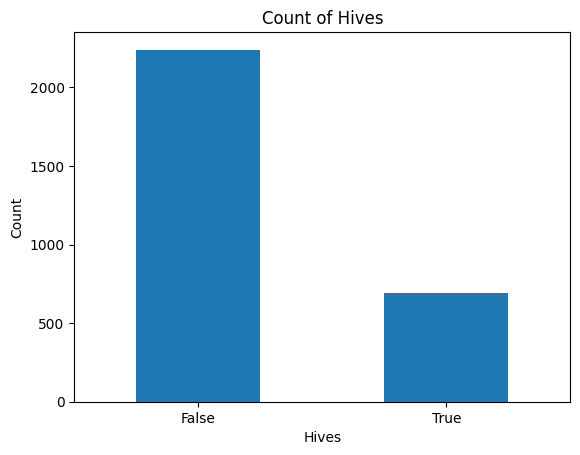

In [75]:
Data_3['Hives'].value_counts().plot(kind='bar')
plt.title('Count of Hives')
plt.xlabel('Hives')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

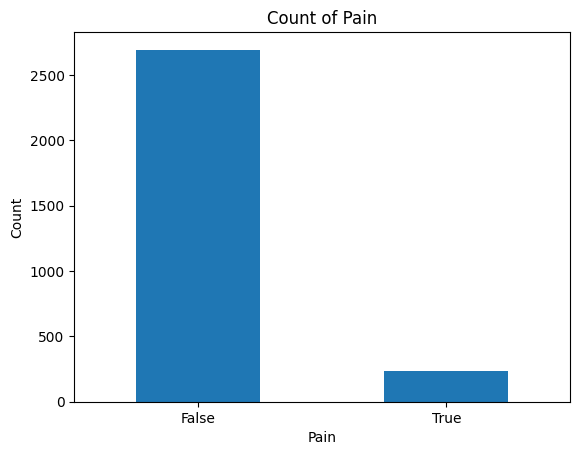

In [76]:
Data_3['Acne'].value_counts().plot(kind='bar')
plt.title('Count of Pain')
plt.xlabel('Pain')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

In [77]:
Data_3.groupby('medical_condition')['medical_condition'].value_counts()

medical_condition
ADHD                     55
AIDS/HIV                109
Acne                    238
Allergies                14
Alzheimer's              27
Angina                   71
Anxiety                  45
Asthma                   45
Bipolar Disorder         47
Bronchitis               71
COPD                     23
Cancer                   20
Cholesterol              45
Colds & Flu             245
Constipation             60
Covid 19                 34
Depression               51
Diabetes (Type 1)        57
Diabetes (Type 2)       104
Diarrhea                 38
Eczema                  122
Erectile Dysfunction     13
GERD (Heartburn)         77
Gastrointestinal          7
Gout                      9
Hair Loss                11
Hayfever                124
Herpes                   10
Hypertension            177
Hypothyroidism           17
IBD (Bowel)              22
Incontinence             19
Insomnia                 60
Menopause                 7
Migraine                 61
Os

In [78]:
def pre_cat(P_input):
    if P_input in ['A','B','C','D','X','N']:
        Preg_cat = Data_3.where(Data_3['pregnancy_category'] == P_input)
        print(Preg_cat.groupby(['medical_condition','rx_otc','drug_classes','csa'])['medical_condition'].value_counts().sort_values(ascending = False))
    else:
        print("Error")


In [79]:
def csa(csa_input):
    if csa_input in ['1','2','3','4','5','X','M','N']:
        Preg_cat = Data_3.where(Data_3['csa'] == csa_input)
        print (Preg_cat.groupby(['medical_condition','rx_otc','drug_classes','pregnancy_category'])['medical_condition'].value_counts().sort_values(ascending = False))
    else:
        print("Error")

In [80]:
csa("2")

medical_condition  rx_otc  drug_classes                                 pregnancy_category
ADHD               Rx      CNS stimulants                               C                     34
Pain               Rx      Opioids (narcotic analgesics)                C                     28
                                                                        N                     10
                           Narcotic analgesic combinations              C                      9
Colds & Flu        Rx      Upper respiratory combinations               C                      3
ADHD               Rx      Anorexiants, CNS stimulants                  C                      2
Pain               Rx      Narcotic analgesic combinations              B                      2
                           Antitussives, Opioids (narcotic analgesics)  C                      1
Diarrhea           Rx      Antitussives, Opioids (narcotic analgesics)  C                      1
Insomnia           Rx      Barbitura

In [81]:
pre_cat("A")

medical_condition  rx_otc  drug_classes   csa
Hypothyroidism     Rx      Thyroid drugs  N      17
Depression         Rx      Thyroid drugs  N       1
Name: count, dtype: int64


In [82]:
pd.set_option('display.max_colwidth',None)


In [83]:
Data_3['side_effects']

0                                                                                                                                                                                                                                                                                                                                                                   (hives, difficult breathing, swelling in your face or throat) or a severe skin reaction (fever, sore throat, burning in your eyes, skin pain, red or purple skin rash that spreads and causes blistering and peeling). Seek medical treatment if you have a serious drug reaction that can affect many parts of your body. Symptoms may include: skin rash, fever, swollen glands, flu-like symptoms, muscle aches, severe weakness, unusual bruising, or yellowing of your skin or eyes. This reaction may occur several weeks after you began using doxycycline. Doxycycline may cause serious side effects. Call your doctor at once if you have: severe stomach 

In [84]:
def has_urination(text):
    return 'no urination' in text.lower()
Data_3['no urination'] = Data_3['side_effects'].apply(has_urination)

In [85]:
def has_jaundice(text):
    return 'jaundice' in text.lower()
Data_3['jaundice'] = Data_3['side_effects'].apply(has_jaundice)

In [86]:
def has_hallucinations(text):
    return 'hallucinations' in text.lower()
Data_3['hallucinations'] = Data_3['side_effects'].apply(has_hallucinations)

In [87]:

def has_anxiety(text):
    return 'anxiety' in text.lower()
Data_3['anxiety'] = Data_3['side_effects'].apply(has_anxiety)
    

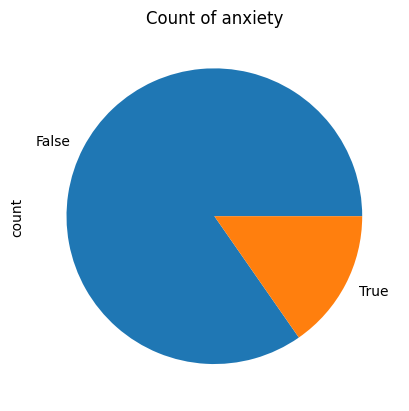

In [91]:
Data_3['anxiety'].value_counts().plot(kind = 'pie')
plt.title('Count of anxiety')
plt.show()


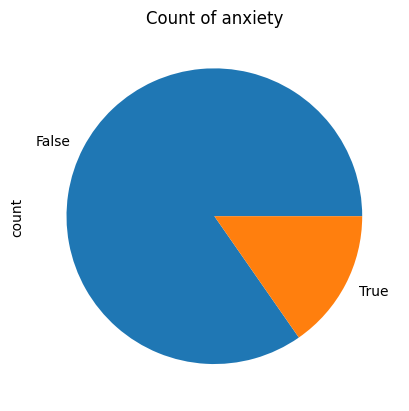

In [92]:
Data_3['anxiety'].value_counts().plot(kind = 'pie')
plt.title('Count of anxiety')

plt.show()


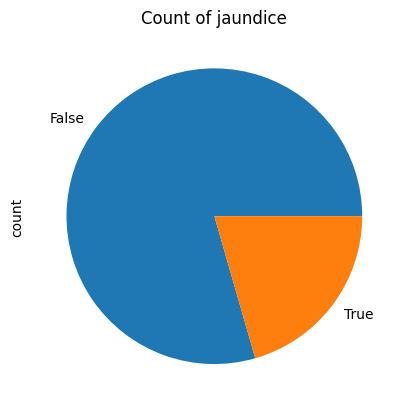

In [93]:
Data_3['jaundice'].value_counts().plot(kind = 'pie')
plt.title('Count of jaundice')

plt.show()


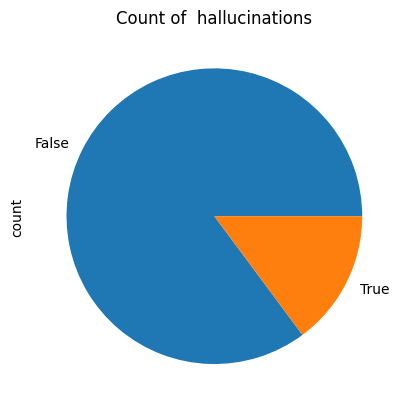

In [95]:

Data_3['hallucinations'].value_counts().plot(kind = 'pie')
plt.title('Count of  hallucinations')

plt.show()


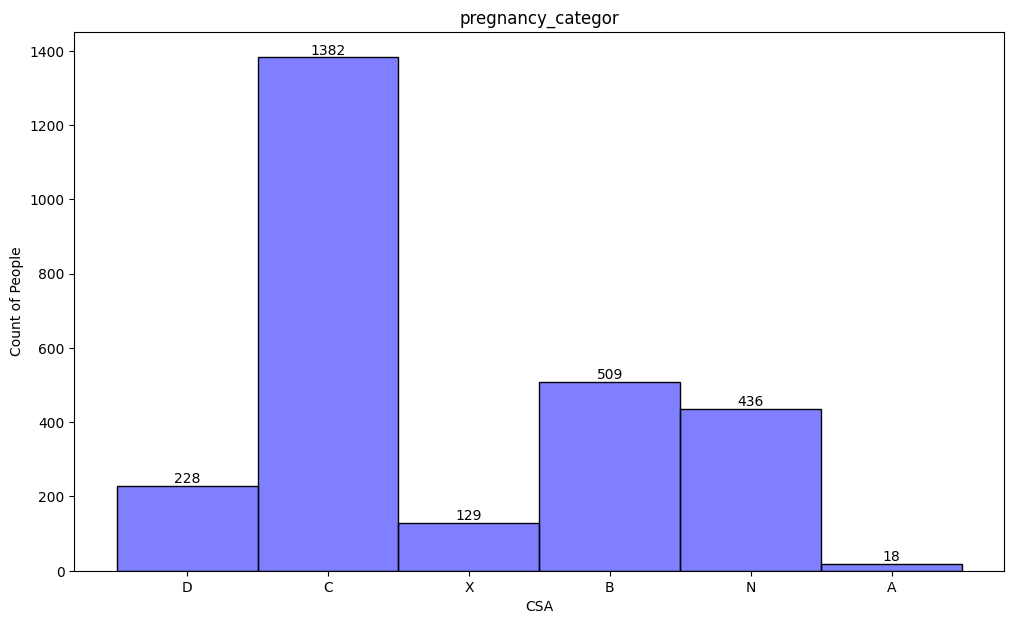

In [96]:

plt.figure(figsize = (12,7))

cx = sns.histplot(data = Data_3, x = 'pregnancy_category' , color = 'blue',edgecolor = 'black', alpha = 0.5)
for bar in cx.patches:
    height = bar.get_height()
    cx.text(bar.get_x() + bar.get_width()/2, height + 0.1, int(height),
            ha='center', va='bottom', fontsize=10, color='black')
plt.title ("pregnancy_categor")
plt.xlabel("CSA")
plt.ylabel("Count of People")
plt.show()

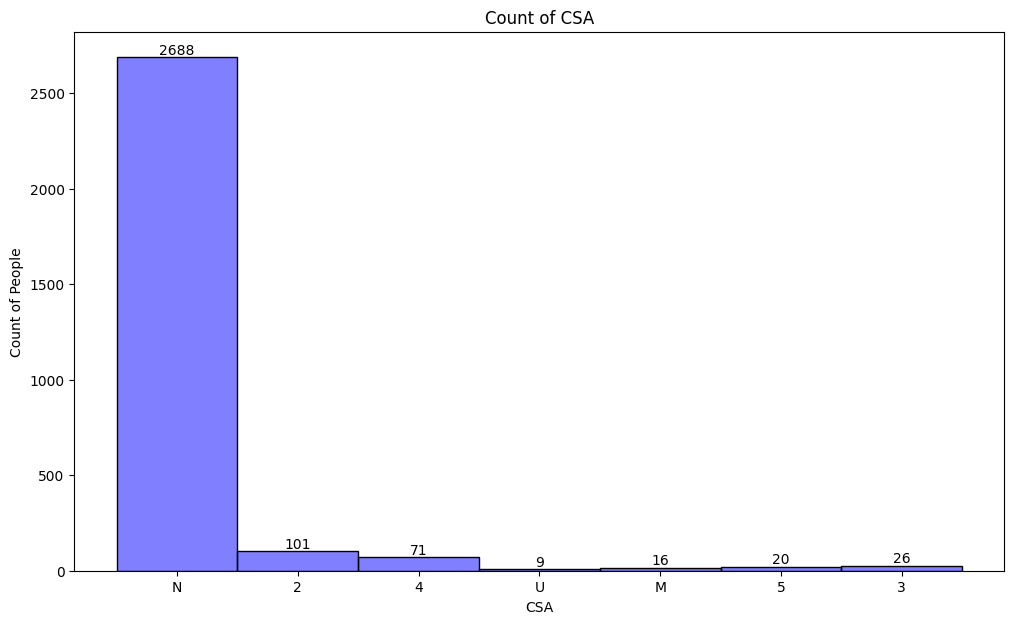

In [75]:

plt.figure(figsize = (12,7))

bx = sns.histplot(data = Data_3, x = 'csa' , color = 'blue',edgecolor = 'black', alpha = 0.5)
for bar in bx.patches:
    height = bar.get_height()
    bx.text(bar.get_x() + bar.get_width()/2, height + 0.1, int(height),
            ha='center', va='bottom', fontsize=10, color='black')
plt.title ("Count of CSA")
plt.xlabel("CSA")
plt.ylabel("Count of People")
plt.show()

In [76]:
Data_3

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,...,medical_condition_url,Hives,Difficult Breathing,Itching,Colds & Flu,Acne,no urination,jaundice,hallucinations,anxiety
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your face or throat) or a severe skin reaction (fever, sore throat, burning in your eyes, skin pain, red or purple skin rash that spreads and causes blistering and peeling). Seek medical treatment if you have a serious drug reaction that can affect many parts of your body. Symptoms may include: skin rash, fever, swollen glands, flu-like symptoms, muscle aches, severe weakness, unusual bruising, or yellowing of your skin or eyes. This reaction may occur several weeks after you began using doxycycline. Doxycycline may cause serious side effects. Call your doctor at once if you have: severe stomach pain, diarrhea that is watery or bloody; throat irritation, trouble swallowing; chest pain, irregular heart rhythm, feeling short of breath; little or no urination; low white blood cell counts - fever, chills, swollen glands, body aches, weakness, pale skin, easy bruising or bleeding; severe headaches, ringing in your ears, dizziness, nausea, vision problems, pain behind your eyes; loss of appetite, upper stomach pain (that may spread to your back), tiredness, nausea or vomiting, fast heart rate, dark urine, jaundice (yellowing of the skin or eyes). Common side effects of doxycycline may include: nausea and vomiting; upset stomach; loss of appetite; mild diarrhea; skin rash or itching; darkened skin color; vaginal itching or discharge.",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alodox, Avidoxy, Doryx, Mondoxyne NL, Monodox, Morgidox, Okebo, Oracea, Oraxyl, Periostat Targadox, Vibramycin calcium, Vibramycin Hyclate, Vibramycin monohydrate, Vibra-Tabs",87.0,Rx,D,N,...,https://www.drugs.com/condition/acne.html,True,True,True,False,True,True,True,False,False
1,spironolactone,Acne,"hives ; difficulty breathing; swelling of your face, lips, tongue, or throat. Call your doctor at once if you have: a light-headed feeling, like you might pass out; little or no urination; high potassium level - nausea , weakness, tingly feeling, chest pain, irregular heartbeats, loss of movement; o signs of other electrolyte imbalances - increased thirst or urination, confusion, vomiting , muscle pain, slurred speech, severe weakness, numbness , loss of coordination, feeling unsteady. Common spironolactone side effects may include: breast swelling or tenderness.",spironolactone,"Aldosterone receptor antagonists, Potassium-sparing diuretics","Aldactone, CaroSpir",82.0,Rx,C,N,...,https://www.drugs.com/condition/acne.html,True,True,False,False,True,True,False,False,False
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like symptoms, muscle aches, severe weakness, unusual bruising, or yellowing of your skin or eyes. This may be more likely with long-term use of minocycline, and the reaction may occur several weeks after you began using this medicine. Call your doctor at once if you have: little or no urination, swelling in your feet or ankles, feeling tired or short of breath (signs of kidney problems); loss of appetite, upper stomach pain (that may spread to your back), nausea or vomiting, loss of appetite, easy bruising or bleeding, dark urine, yellowing of the skin or eyes (signs of liver or pancreas problems); joint pain or swelling with fever, swollen glands, muscle aches, chest pain, vomiting, unusual thoughts or behavior, and patchy skin color; severe headaches, ringing in your ears, dizziness, vision problems, pain behind your eyes; or swollen glands, flu symptoms, easy bruising or bleeding, severe tingling or numbness, muscle weakness, chest pain, new or worsening cough with fever, trouble breathing. Common minocycline side effects may include: numbness , tingling, burning pain; hair loss ; dis

In [77]:
pd.set_option('display.max_colwidth',20)

In [78]:
Data_3.columns


Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url', 'Hives', 'Difficult Breathing', 'Itching',
       'Colds & Flu', 'Acne', 'no urination', 'jaundice', 'hallucinations',
       'anxiety'],
      dtype='object')

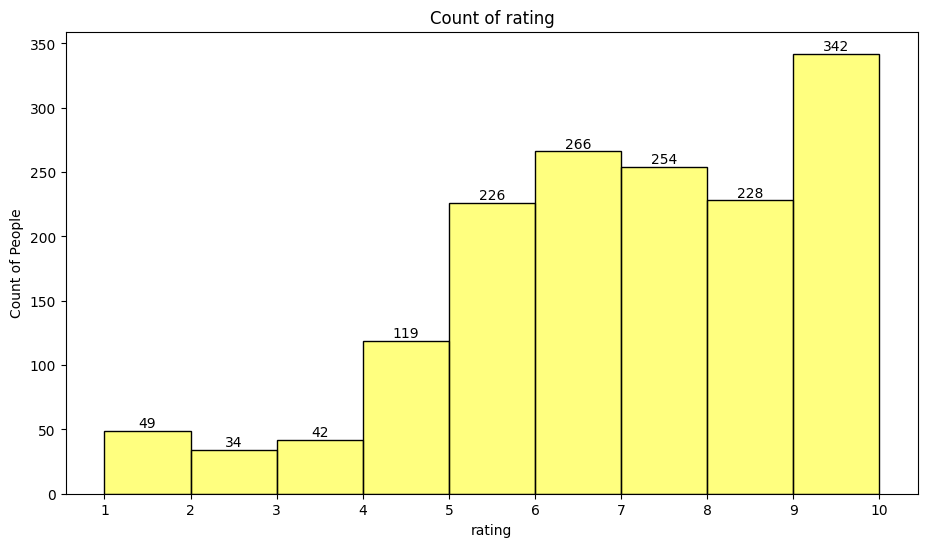

In [79]:
plt.figure(figsize =  (11,6))
ax = sns.histplot(data = Data_3, x = 'rating', color = 'Yellow', edgecolor = 'black', alpha = 0.5, bins = [1,2,3,4,5,6,7,8,9,10] )
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.1, int(height),
            ha='center', va='bottom', fontsize=10, color='black')
plt.title ("Count of rating")
plt.xlabel("rating")
plt.ylabel("Count of People")
plt.xticks([1,2,3,4,5,6,7,8,9,10])

plt.show()

In [80]:
Data_3['csa'].to_string

<bound method Series.to_string of 0       N
1       N
2       N
3       N
4       N
       ..
2926    3
2927    4
2928    3
2929    N
2930    N
Name: csa, Length: 2931, dtype: object>

 B


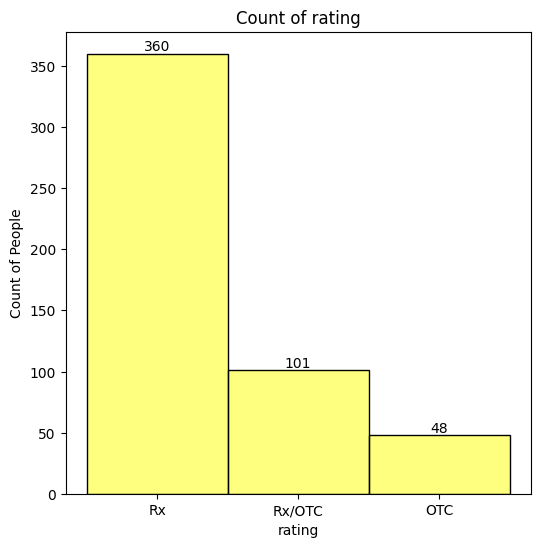

In [81]:
Data_4 = Data_3[Data_3['pregnancy_category'] == input("")]

plt.figure(figsize =  (6,6))
ax = sns.histplot(data = Data_4, x = 'rx_otc', color = 'Yellow', edgecolor = 'black', alpha = 0.5, binwidth = 0.5 )
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.1, int(height),
            ha='center', va='bottom', fontsize=10, color='black')
plt.title ("Count of rating")
plt.xlabel("rating")
plt.ylabel("Count of People")
plt.show()

 M


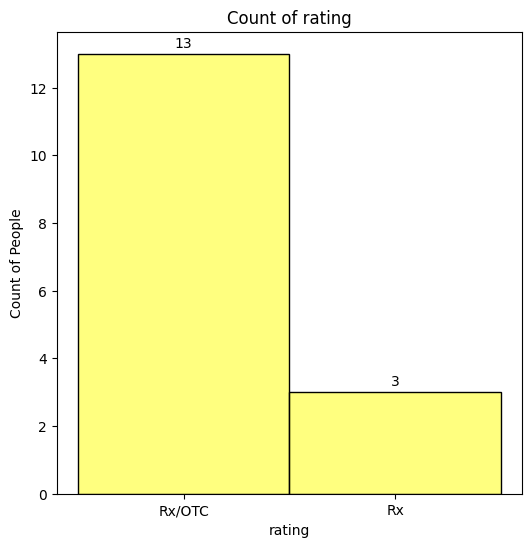

In [85]:
csa = input("")
csa_str = str(csa)
Data_5 = Data_3[Data_3['csa'] == csa_str]

plt.figure(figsize =  (6,6))
ex = sns.histplot(data = Data_5, x = 'rx_otc', color = 'Yellow', edgecolor = 'black', alpha = 0.5, binwidth = 0.5 )
for bar in ex.patches:
    height = bar.get_height()
    ex.text(bar.get_x() + bar.get_width()/2, height + 0.1, int(height),
            ha='center', va='bottom', fontsize=10, color='black')
plt.title ("Count of rating")
plt.xlabel("rating")
plt.ylabel("Count of People")
plt.show()